## scikit-learn による機械学習


### Install
`$ pip3 install scikit-learn`

## Refrence
* https://scikit-learn.org/stable/tutorial/index.html


* LinearRegressionについて : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* PolynomialFeaturesについて : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
np.random.seed(0)

## データの生成

In [5]:
n_sample = 200

x0 = np.linspace(0, 2 * np.pi, num=n_sample)

y_org0 = np.sin(x0)
y0 = np.sin(x0) + np.random.normal(0.0, 0.1, size=n_sample)

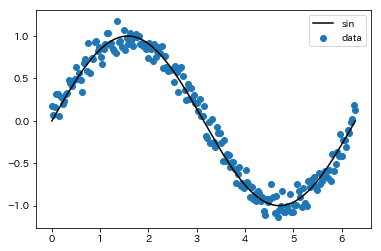

In [6]:
plt.scatter(x0, y0, label='data')
plt.plot(x0, y_org0, label='sin', color="black")
plt.legend()

plt.show()

## $[0, \pi/5]$の範囲で線形回帰

In [7]:
n_mini = int(n_sample/10)
x = x0[:n_mini]
y = y0[:n_mini]
y_true = y_org0[:n_mini]

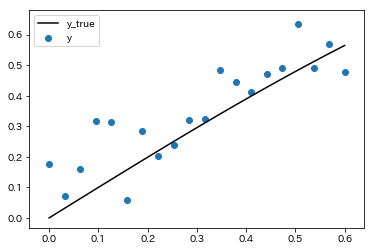

In [9]:
plt.scatter(x, y, label='y')
plt.plot(x, y_true, label='y_true', color="black")
plt.legend()

plt.show()

In [11]:
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y)

/Users/kevin/python-venv/def/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$y = w_0 x + b$

$w_0 =$ reg.coef_[0]

$b =$ reg.coef_

In [12]:
print(reg.coef_, reg.intercept_ )

[0.75634734] 0.1206668931416853


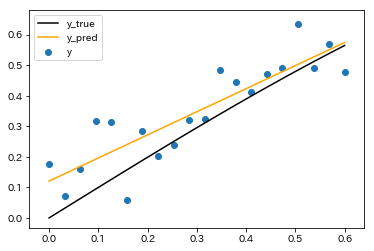

In [13]:
plt.scatter(x, y, label="y")
plt.plot(x, y_true, label="y_true", color="black")
plt.plot(x, reg.predict(x.reshape(-1, 1)), label="y_pred", color="orange")
plt.legend()

plt.show()

## $[0, 2\pi]$の範囲で線形回帰

In [15]:
reg = LinearRegression()
reg.fit(x0.reshape(-1, 1), y0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

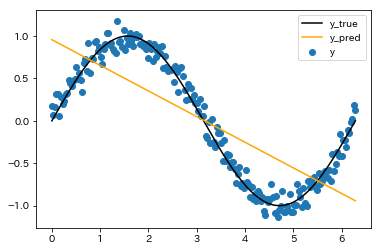

In [16]:
plt.scatter(x0, y0, label="y")
plt.plot(x0, y_org0, label="y_true", color="black")
plt.plot(x0, reg.predict(x0.reshape(-1, 1)), label="y_pred", color="orange")
plt.legend()

plt.show()

全然ダメなので，多項式でやろう

$y = b + w_0 x + w_1 x^2 + w_2 x^3$

$w_{i+1} =$ reg.coef_[i]

$b =$ reg.coef_

In [12]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly0 = poly3.fit_transform(x0.reshape(-1, 1))
print(x_poly0[:10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.15737955e-02 9.96904563e-04 3.14760608e-05]
 [6.31475910e-02 3.98761825e-03 2.51808487e-04]
 [9.47213865e-02 8.97214107e-03 8.49853642e-04]
 [1.26295182e-01 1.59504730e-02 2.01446789e-03]
 [1.57868978e-01 2.49226141e-02 3.93450760e-03]
 [1.89442773e-01 3.58885643e-02 6.79882914e-03]
 [2.21016569e-01 4.88483236e-02 1.07962889e-02]
 [2.52590364e-01 6.38018920e-02 1.61157431e-02]
 [2.84164160e-01 8.07492696e-02 2.29460483e-02]]


In [13]:
reg = LinearRegression()
reg.fit(x_poly0, y0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

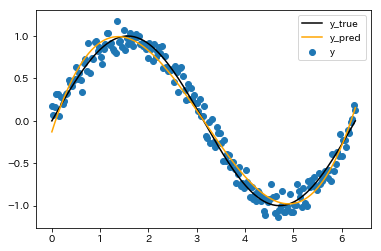

In [14]:
plt.scatter(x0, y0, label="y")
plt.plot(x0, y_org0, label="y_true", color="black")
plt.plot(x0, reg.predict(x_poly0), label="y_pred", color="orange")
plt.legend()

plt.show()

## 過学習について

In [15]:
n_sample = 10

x1 = np.linspace(0, 2 * np.pi, num=n_sample)

y_org1 = np.sin(x1)
y1 = np.sin(x1) + np.random.normal(0.0, 0.1, size=n_sample)

### 10次の項までで

In [16]:
poly10 = PolynomialFeatures(degree=10, include_bias=False)
x_poly1 = poly10.fit_transform(x1.reshape(-1, 1))
print(x_poly1[:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.98131701e-01 4.87387872e-01 3.40260924e-01 2.37546937e-01
  1.65839047e-01 1.15777496e-01 8.08279404e-02 5.64285475e-02
  3.93945578e-02 2.75025897e-02]
 [1.39626340e+00 1.94955149e+00 2.72208739e+00 3.80075100e+00
  5.30684952e+00 7.40975976e+00 1.03459764e+01 1.44457082e+01
  2.01700136e+01 2.81626518e+01]
 [2.09439510e+00 4.38649084e+00 9.18704494e+00 1.92413019e+01
  4.02988885e+01 8.44017948e+01 1.76770706e+02 3.70227700e+02
  7.75403082e+02 1.62400042e+03]
 [2.79252680e+00 7.79820595e+00 2.17766991e+01 6.08120160e+01
  1.69819185e+02 4.74224625e+02 1.32428498e+03 3.69810129e+03
  1.03270470e+04 2.88385555e+04]]


In [17]:
reg = LinearRegression()
reg.fit(x_poly1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

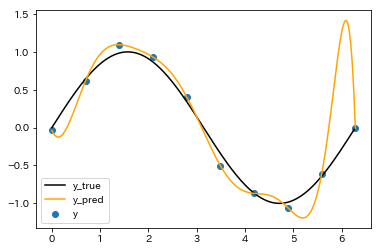

In [18]:
plt.scatter(x1, y1, label="y")
plt.plot(x0, y_org0, label="y_true", color="black")
plt.plot(x0, reg.predict(poly10.fit_transform(x0.reshape(-1, 1))), label="y_pred", color="orange")
plt.legend()

plt.show()

---

[Topへ戻る](https://github.com/Kevinrobot34/MLwithPython)